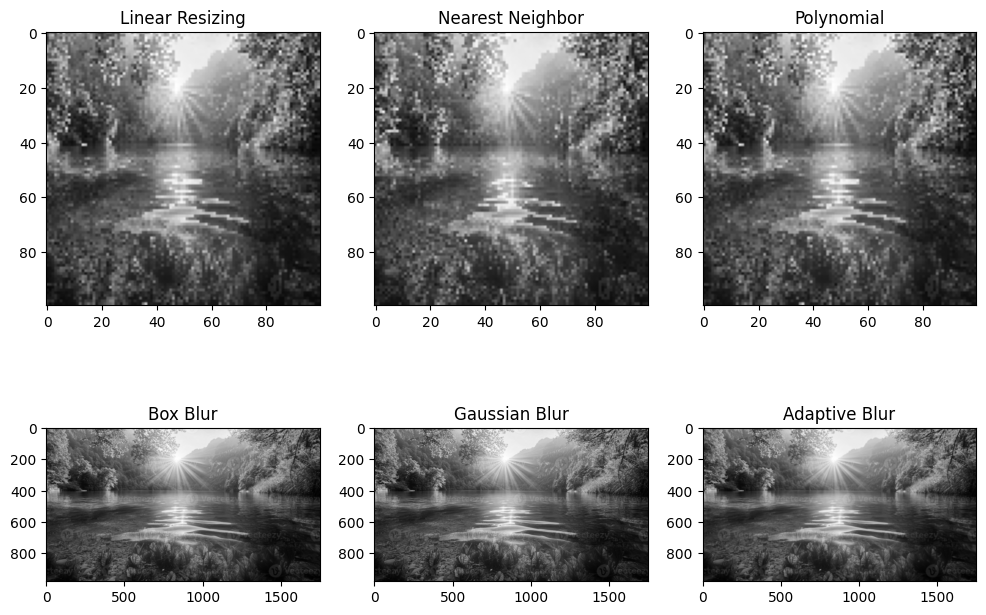

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import mnist

# Task 1: Image Processing
# Load an example image
image = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)

# 1.1 Image Resizing
linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
poly_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

# 1.2 Image Blurring
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Plot results
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(linear_resized, cmap='gray'); axs[0, 0].set_title("Linear Resizing")
axs[0, 1].imshow(nearest_resized, cmap='gray'); axs[0, 1].set_title("Nearest Neighbor")
axs[0, 2].imshow(poly_resized, cmap='gray'); axs[0, 2].set_title("Polynomial")
axs[1, 0].imshow(box_blur, cmap='gray'); axs[1, 0].set_title("Box Blur")
axs[1, 1].imshow(gaussian_blur, cmap='gray'); axs[1, 1].set_title("Gaussian Blur")
axs[1, 2].imshow(adaptive_blur, cmap='gray'); axs[1, 2].set_title("Adaptive Blur")
plt.show()





Evaluating Naive Bayes...
Accuracy: 0.5576
Precision: 0.5298
Recall: 0.9919
F1-Score: 0.6906
ROC AUC: 0.8819

Evaluating Random Forest...
Accuracy: 0.9777
Precision: 0.9820
Recall: 0.9734
F1-Score: 0.9777
ROC AUC: 1.0000

Evaluating SVM...
Accuracy: 0.9844
Precision: 0.9843
Recall: 0.9842
F1-Score: 0.9842
ROC AUC: 0.9995


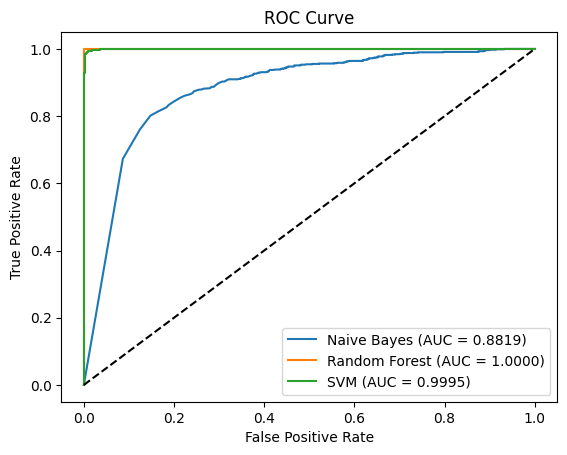

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Convert to binary classification for ROC/AUC
y = (y > 4).astype(int)  # Convert labels to 0 (digits 0-4) and 1 (digits 5-9)

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize evaluation lists
acc_scores = {}
prec_scores = {}
rec_scores = {}
f1_scores = {}
roc_auc_scores = {}

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Cross-validation scores
    acc = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=kf, scoring='precision').mean()
    rec = cross_val_score(model, X, y, cv=kf, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=kf, scoring='f1').mean()

    acc_scores[name] = acc
    prec_scores[name] = prec
    rec_scores[name] = rec
    f1_scores[name] = f1

    # Train and predict on full dataset
    model.fit(X, y)
    y_prob = model.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_prob)
    roc_auc_scores[name] = roc_auc

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
